Medical Cost Personal

Apply supervised models 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# Load dataset
df = pd.read_csv("insurance.csv") 

In [29]:
# Define features and target
X = df.drop(columns=["charges"])
y = df["charges"]


In [30]:
# Identify categorical and numerical features
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

In [31]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop='first'), categorical_features)
])


In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}


In [34]:
# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

In [35]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R2", ascending=False))


                                   MAE           MSE        R2
Gradient Boosting          2443.483262  1.874518e+07  0.879257
Random Forest              2543.975825  2.086457e+07  0.865606
Linear Regression          4181.194474  3.359692e+07  0.783593
Decision Tree              3114.152909  4.079533e+07  0.737226
Support Vector Regression  8606.592261  1.663481e+08 -0.071494


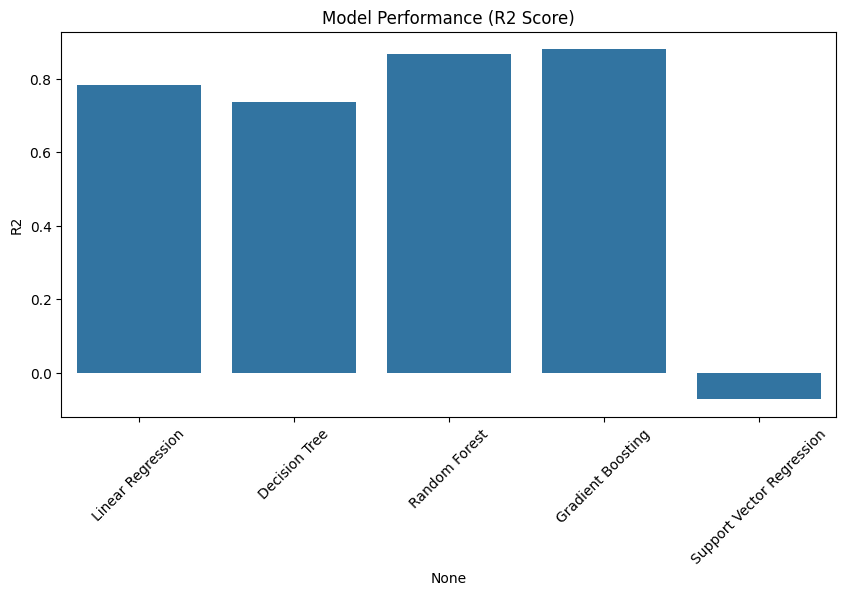

In [36]:
# Plot model performance
plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df["R2"])
plt.xticks(rotation=45)
plt.title("Model Performance (R2 Score)")
plt.show()


Gradient Boosting performed the best

Lowest MAE (2443.48) and highest R² (0.879)
This means Gradient Boosting can explain ~88% of the variance in the insurance charges.
Random Forest is also strong

MAE and MSE are slightly higher than Gradient Boosting.
R² is 0.865, meaning it also explains a significant portion of the variance.
Linear Regression is weaker

Higher MAE (4181) and lower R² (0.783)
This suggests that a simple linear relationship does not capture the complexity of the data well.
Decision Tree is overfitting

Performs worse than ensemble models.
High variance due to lack of generalization.
Support Vector Regression (SVR) failed

Worst MAE (8606) and negative R² (-0.071) → Means the model performed worse than just predicting the mean of the dataset.
SVR might not be well-suited for this dataset due to its complex patterns.

LinearRegression From Scratch

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class LinearRegression:
    def __init__(self, l2_lambda=0.01):
        self.parameters = {}
        self.l2_lambda = l2_lambda  # L2 regularization strength
    
    def forward_propagation(self, train_input):
        return np.dot(train_input, self.parameters['weights']) + self.parameters['bias']
    
    def cost_function(self, predictions, train_output):
        mse = np.mean((train_output - predictions) ** 2)
        l2_penalty = self.l2_lambda * np.sum(self.parameters['weights'] ** 2)  # L2 Regularization
        return mse + l2_penalty
    
    def backward_propagation(self, train_input, train_output, predictions):
        n = len(train_output)
        df = (predictions - train_output)
        dw = (2/n) * np.dot(train_input.T, df) + 2 * self.l2_lambda * self.parameters['weights']  # L2 term
        db = (2/n) * np.sum(df)
        return {'dw': dw, 'db': db}
    
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['weights'] -= learning_rate * derivatives['dw']
        self.parameters['bias'] -= learning_rate * derivatives['db']
    
    def train(self, train_input, train_output, learning_rate, iters, tolerance=1e-6):
        num_features = train_input.shape[1]
        self.parameters['weights'] = np.random.randn(num_features)
        self.parameters['bias'] = np.random.randn()
        self.loss = []
        
        prev_loss = float('inf')
        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            print(f"Iteration {i+1}, Loss: {cost}")
            
            # Early stopping condition
            if abs(prev_loss - cost) < tolerance:
                print(f"Early stopping at iteration {i+1}")
                break
            prev_loss = cost
        
        return self.parameters, self.loss


In [76]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Preprocess data
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
y_scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ("num", scaler, numerical_features),
    ("cat", ohe, categorical_features)
])

X = preprocessor.fit_transform(df.drop(columns=["charges"]))
y = df["charges"].values.reshape(-1, 1)
y = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Train Linear Regression model with L2 regularization
model = LinearRegression(l2_lambda=0.01)
params, loss = model.train(X_train, y_train, learning_rate=0.005, iters=1500)


Iteration 1, Loss: 1.8230809807460941
Iteration 2, Loss: 1.8020083583455806
Iteration 3, Loss: 1.7813505393509912
Iteration 4, Loss: 1.7610985545650992
Iteration 5, Loss: 1.7412436344992794
Iteration 6, Loss: 1.7217772048364146
Iteration 7, Loss: 1.7026908819991426
Iteration 8, Loss: 1.6839764688209389
Iteration 9, Loss: 1.6656259503175883
Iteration 10, Loss: 1.6476314895566506
Iteration 11, Loss: 1.6299854236226052
Iteration 12, Loss: 1.6126802596753864
Iteration 13, Loss: 1.5957086711001085
Iteration 14, Loss: 1.5790634937458075
Iteration 15, Loss: 1.5627377222510952
Iteration 16, Loss: 1.5467245064546653
Iteration 17, Loss: 1.5310171478886458
Iteration 18, Loss: 1.515609096352836
Iteration 19, Loss: 1.50049394656792
Iteration 20, Loss: 1.4856654349057858
Iteration 21, Loss: 1.4711174361951398
Iteration 22, Loss: 1.4568439606006298
Iteration 23, Loss: 1.4428391505737537
Iteration 24, Loss: 1.429097277873858
Iteration 25, Loss: 1.4156127406575771
Iteration 26, Loss: 1.4023800606351051

In [78]:
# Make predictions
y_pred = model.forward_propagation(X_test)


In [79]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [80]:
# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 0.3729755137449103
MSE: 0.24537757203003574
R2 Score: 0.7683825954954313


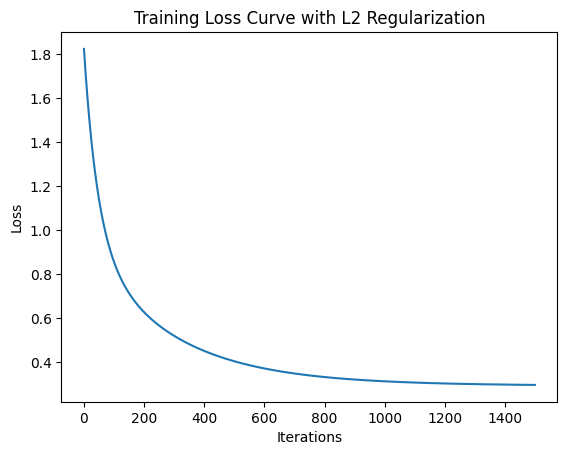

In [81]:
# Plot loss curve
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve with L2 Regularization")
plt.show()

better than first try

Try DecisionTree 

In [105]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
        self.loss_history = []
    
    def fit(self, X, y, epochs=10):
        self.loss_history = []
        for epoch in range(epochs):  # Iterative training
            self.tree = self._grow_tree(X, y, depth=0)
            y_pred = self.predict(X)
            loss = mean_squared_error(y, y_pred)
            self.loss_history.append(loss)
            print(f"Epoch {epoch + 1}, Loss: {loss}")
    
    def _grow_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if depth >= self.max_depth or num_samples < self.min_samples_split:
            return np.mean(y)
        
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return np.mean(y)
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        left_subtree = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
        
        return {"feature": best_feature, "threshold": best_threshold, "left": left_subtree, "right": right_subtree}
    
    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        if num_samples <= 1:
            return None, None
        
        best_mse = float("inf")
        best_feature, best_threshold = None, None
        
        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                
                if sum(left_mask) == 0 or sum(right_mask) == 0:
                    continue
                
                mse = self._calculate_mse(y[left_mask], y[right_mask])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _calculate_mse(self, y_left, y_right):
        mse_left = np.var(y_left) * len(y_left) if len(y_left) > 0 else 0
        mse_right = np.var(y_right) * len(y_right) if len(y_right) > 0 else 0
        return (mse_left + mse_right) / (len(y_left) + len(y_right))
    
    def predict(self, X):
        return np.array([self._traverse_tree(sample, self.tree) for sample in X])
    
    def _traverse_tree(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature, threshold = tree["feature"], tree["threshold"]
        if x[feature] <= threshold:
            return self._traverse_tree(x, tree["left"])
        else:
            return self._traverse_tree(x, tree["right"])


In [106]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Preprocess data
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
y_scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ("num", scaler, numerical_features),
    ("cat", ohe, categorical_features)
])

X = preprocessor.fit_transform(df.drop(columns=["charges"]))
y = df["charges"].values.reshape(-1, 1)
y = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Train Decision Tree model
model = DecisionTree(max_depth=10, min_samples_split=5)
model.fit(X_train, y_train, epochs=20)


Epoch 1, Loss: 0.05158047257054156
Epoch 2, Loss: 0.05158047257054156
Epoch 3, Loss: 0.05158047257054156
Epoch 4, Loss: 0.05158047257054156
Epoch 5, Loss: 0.05158047257054156
Epoch 6, Loss: 0.05158047257054156
Epoch 7, Loss: 0.05158047257054156
Epoch 8, Loss: 0.05158047257054156
Epoch 9, Loss: 0.05158047257054156
Epoch 10, Loss: 0.05158047257054156
Epoch 11, Loss: 0.05158047257054156
Epoch 12, Loss: 0.05158047257054156
Epoch 13, Loss: 0.05158047257054156
Epoch 14, Loss: 0.05158047257054156
Epoch 15, Loss: 0.05158047257054156
Epoch 16, Loss: 0.05158047257054156
Epoch 17, Loss: 0.05158047257054156
Epoch 18, Loss: 0.05158047257054156
Epoch 19, Loss: 0.05158047257054156
Epoch 20, Loss: 0.05158047257054156


In [108]:
# Make predictions
y_pred = model.predict(X_test)

In [109]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [110]:
# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 0.22038009008472764
MSE: 0.20250252843682426
R2 Score: 0.8088533126556139


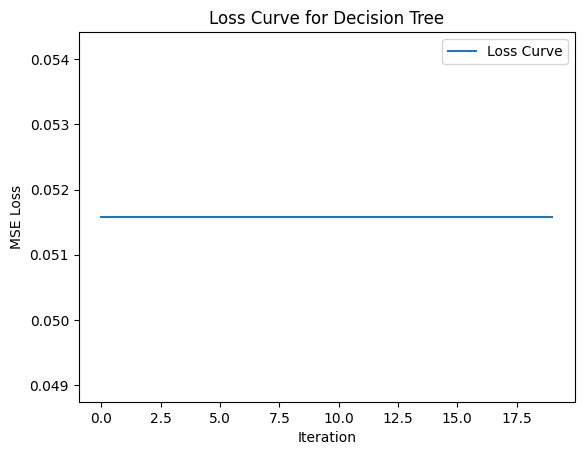

In [111]:
# Plot loss curve
plt.plot(model.loss_history, label='Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss Curve for Decision Tree')
plt.legend()
plt.show()


i got this result once then modify code to ncrease max_depth and decrease min_samples_split.
Add pruning or re-splitting mechanisms for iterative improvement.
Ensure the loss updates correctly at each step.
but i got same results so its not good model 